Naive Bayes Classifier on Iris Dataset:

Dataset:

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

Attribute Information:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class

Class can be one among Iris-setosa,Iris-versicolor and Iris-virginica.



In [ ]:
#Loading packages, dataset and extracting class and feature names.
import pandas as pd
import numpy as np
from math import sqrt
from math import exp
from math import pi
import scipy.stats as stats
import math
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','class'])
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.loc[:,['class']].values.ravel())
classes=le.classes_
print("classes={}".format(classes))
print("features={}".format(list(df.columns)))

classes=['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
features=['sepal length', 'sepal width', 'petal length', 'petal width', 'class']


In [ ]:
# Returns a dictionary named dic whose keys are classes and value is a list. The list consists of 4 tuples(one for each of 4 features). 
# Each tuple consists of the mean, standard deviation, length and feature name.

def summary_dict_by_class(df,classes):
  targets=list(classes)
  dic={}
  features=list(df.columns)
  for target in targets:
    indicesToKeep=df['class'] == target
    
    l=[]
    for i in range(df.shape[1]-1):
      x=df.loc[indicesToKeep,[features[i]]].values
      
      
      mean,stdev,length,name=(np.mean(x),np.std(x),x.shape[0],features[i])
      l.append((mean,stdev,length,name))
    
    dic[target]=l
    
  return dic

In [ ]:
summaries=summary_dict_by_class(df,classes)
print(summaries)

{'Iris-setosa': [(5.006, 0.3489469873777391, 50, 'sepal length'), (3.418, 0.37719490982779713, 50, 'sepal width'), (1.464, 0.17176728442867112, 50, 'petal length'), (0.244, 0.10613199329137281, 50, 'petal width')], 'Iris-versicolor': [(5.936, 0.5109833656783751, 50, 'sepal length'), (2.7700000000000005, 0.31064449134018135, 50, 'sepal width'), (4.26, 0.4651881339845203, 50, 'petal length'), (1.3259999999999998, 0.19576516544063705, 50, 'petal width')], 'Iris-virginica': [(6.587999999999998, 0.6294886813914926, 50, 'sepal length'), (2.974, 0.3192553836664309, 50, 'sepal width'), (5.5520000000000005, 0.546347874526844, 50, 'petal length'), (2.0260000000000002, 0.2718896835115301, 50, 'petal width')]}


In [ ]:
# To compute probability from a gaussian given mean and standard deviation
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent

# Returns probabilities dictionary whose keys are classes and values are corresponding class probabilities(not normalised)
def calculate_class_probabilities(summaries, row):
  
  total_rows = sum([summaries[label][0][2] for label in summaries])
  probabilities = dict()
  for class_value, class_summaries in summaries.items():
    probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
    for i in range(len(class_summaries)):
      mean, stdev, _ ,_= class_summaries[i]
      probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
  return probabilities
 
# Predict the class for a given row
def predict(summaries, row):

	probabilities = calculate_class_probabilities(summaries, row)
	#normalising probabilities
	
	denominator=0
	for key,value in probabilities.items():
		denominator=denominator+value
	for key,value in probabilities.items():
		probabilities[key]=float(value)/denominator
		
	best_label, best_prob = None, -1
	for class_value, probability in probabilities.items():
		if best_label is None or probability > best_prob:
			best_prob = probability
			best_label = class_value
	return probabilities,best_label


In [ ]:
# predicting class for a given example of feature values.
example = [5,2,1,1]
probabilities,label= predict(summaries, example)
print(probabilities)
print('Data=%s, Predicted: %s' % (example, label))

{'Iris-setosa': 0.026661484130693386, 'Iris-versicolor': 0.9733385131552955, 'Iris-virginica': 2.7140111067493886e-09}
Data=[5, 2, 1, 1], Predicted: Iris-versicolor


In [ ]:
# Returns accuracy of Naive Bayes Classifier on our dataset
def accuracy_Naive_Bayes(df,summaries):
  x = df.loc[:, features[0:-1]].values
  y_pred=[]
  for row in x:
    _,label=predict(summaries,row)
    y_pred.append(label)
  y_pred=np.asarray(y_pred)
  y_true = df.loc[:,['class']].values
  k=0
  for i in range(y_pred.shape[0]):
    if(y_pred[i]==y_true[i]):
      k+=1
  return (float(k)/y_pred.shape[0])*100



In [ ]:
print("Accuracy={}".format(accuracy_Naive_Bayes(df,summaries)))

Accuracy=96.0


In [ ]:
# plot the gaussian distribution for each feature for each class seperately based on our model
def plot_gaussians(summaries):
  import matplotlib.pyplot as plt
  import numpy as np
  import scipy.stats as stats
  import math
  plt.figure(figsize=(20,20))
  k=1

  for key,value in summaries.items():

    for v in value:

      (mean,sigma,_,name)=v
      x=np.linspace(mean-3*sigma,mean+3*sigma,100)
      plt.subplot(3,4,k),plt.plot(x, stats.norm.pdf(x, mean, sigma))
      plt.ylabel("feature={}".format(name))
      plt.title("class={}".format(key))
      k+=1
  plt.show()


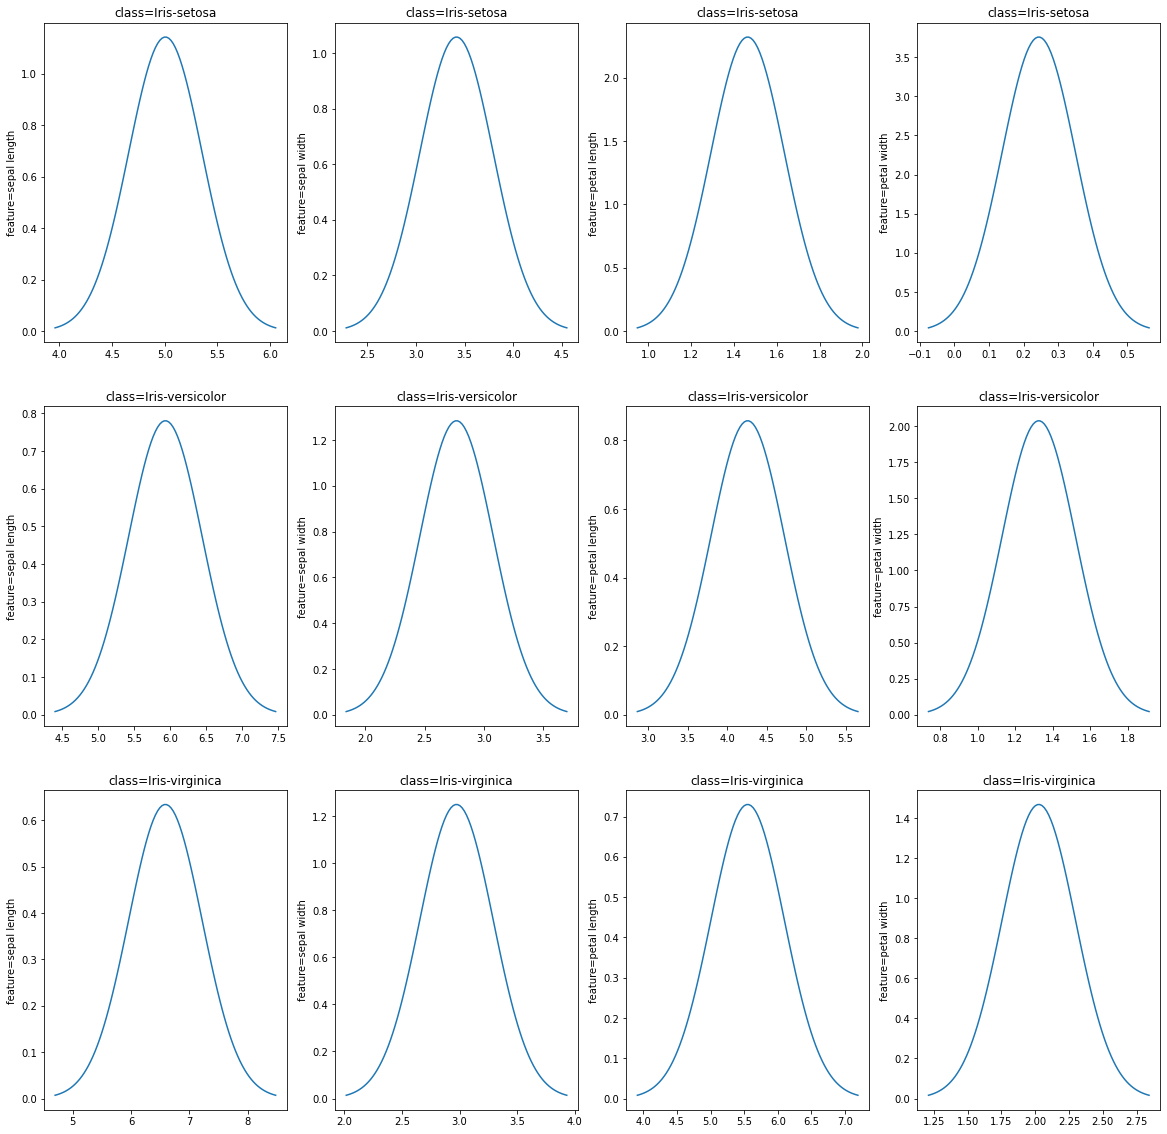

In [ ]:
plot_gaussians(summaries)

In [ ]:
# To visualise true class values versus our Naive Bayes predicted class values using PCA.
def visualise_Naive_Bayes(df,summaries):
  features=list(df.columns)
  targets=list(key for key,value in summaries.items())

  # Separating out the features
  x = df.loc[:, features[0:-1]].values
  y_pred=[]
  for row in x:
    _,label=predict(summaries,row)
    y_pred.append(label)
  y_pred=np.asarray(y_pred)
  pred_df=pd.DataFrame(data=y_pred,columns=['class'])

  # Separating out the target
  y_true = df.loc[:,['class']].values
  # Standardizing the features
  x = StandardScaler().fit_transform(x)
  

  pca = PCA(n_components=2)
  principalComponents = pca.fit_transform(x)
  print(type(principalComponents))
  principaldf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
  finaldf_true = pd.concat([principaldf, df[['class']]], axis = 1)
  finaldf_pred=pd.concat([principaldf, pred_df], axis = 1)
  fig = plt.figure(figsize = (16,8))
  ax1 = fig.add_subplot(1,2,1) 
  ax1.set_xlabel('Principal Component 1', fontsize = 15)
  ax1.set_ylabel('Principal Component 2', fontsize = 15)
  ax1.set_title('2 component PCA Truth', fontsize = 20)

  colors = ['r', 'g', 'b']
  for target, color in zip(targets,colors):
      indicesToKeep = finaldf_true['class'] == target
      ax1.scatter(finaldf_true.loc[indicesToKeep, 'principal component 1']
               , finaldf_true.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
  ax1.legend(targets)
  ax1.grid()
  ax2 = fig.add_subplot(1,2,2) 
  ax2.set_xlabel('Principal Component 1', fontsize = 15)
  ax2.set_ylabel('Principal Component 2', fontsize = 15)
  ax2.set_title('2 component PCA Predicted', fontsize = 20)


  for target, color in zip(targets,colors):
    indicesToKeep = finaldf_pred['class'] == target
    ax2.scatter(finaldf_pred.loc[indicesToKeep, 'principal component 1']
               , finaldf_pred.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
  ax2.legend(targets)
  ax2.grid()



<class 'numpy.ndarray'>


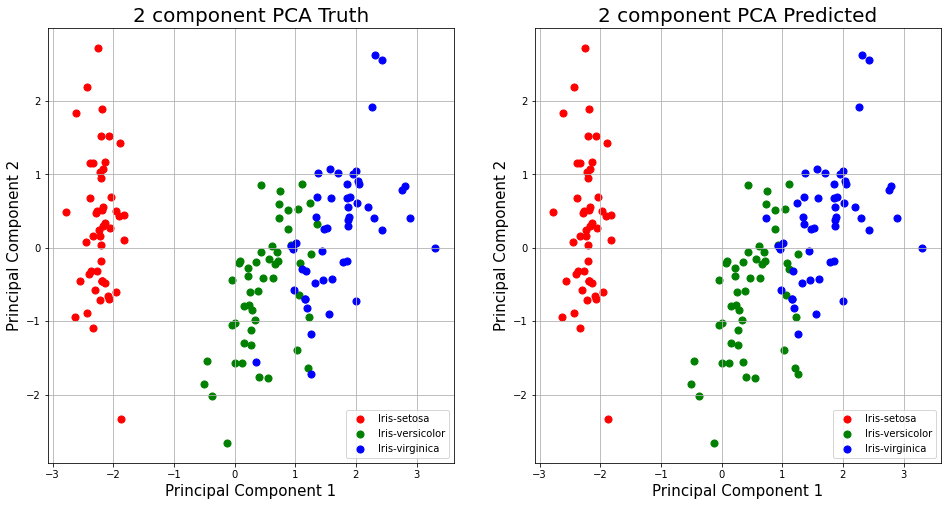

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
visualise_Naive_Bayes(df,summaries)